# Eye of the Emergency

**Sommaire**
1. data 
1. EDA
1. algorithm 
1. conclusion 

In [1]:
import pandas as pd

import missingno as msno 

from wordcloud import WordCloud as WC

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## DATA

In [2]:
df_test = pd.read_csv('test_tweets.csv', sep = ',')
df_train = pd.read_csv('train_tweets.csv', sep = ',')

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [8]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

<AxesSubplot:>

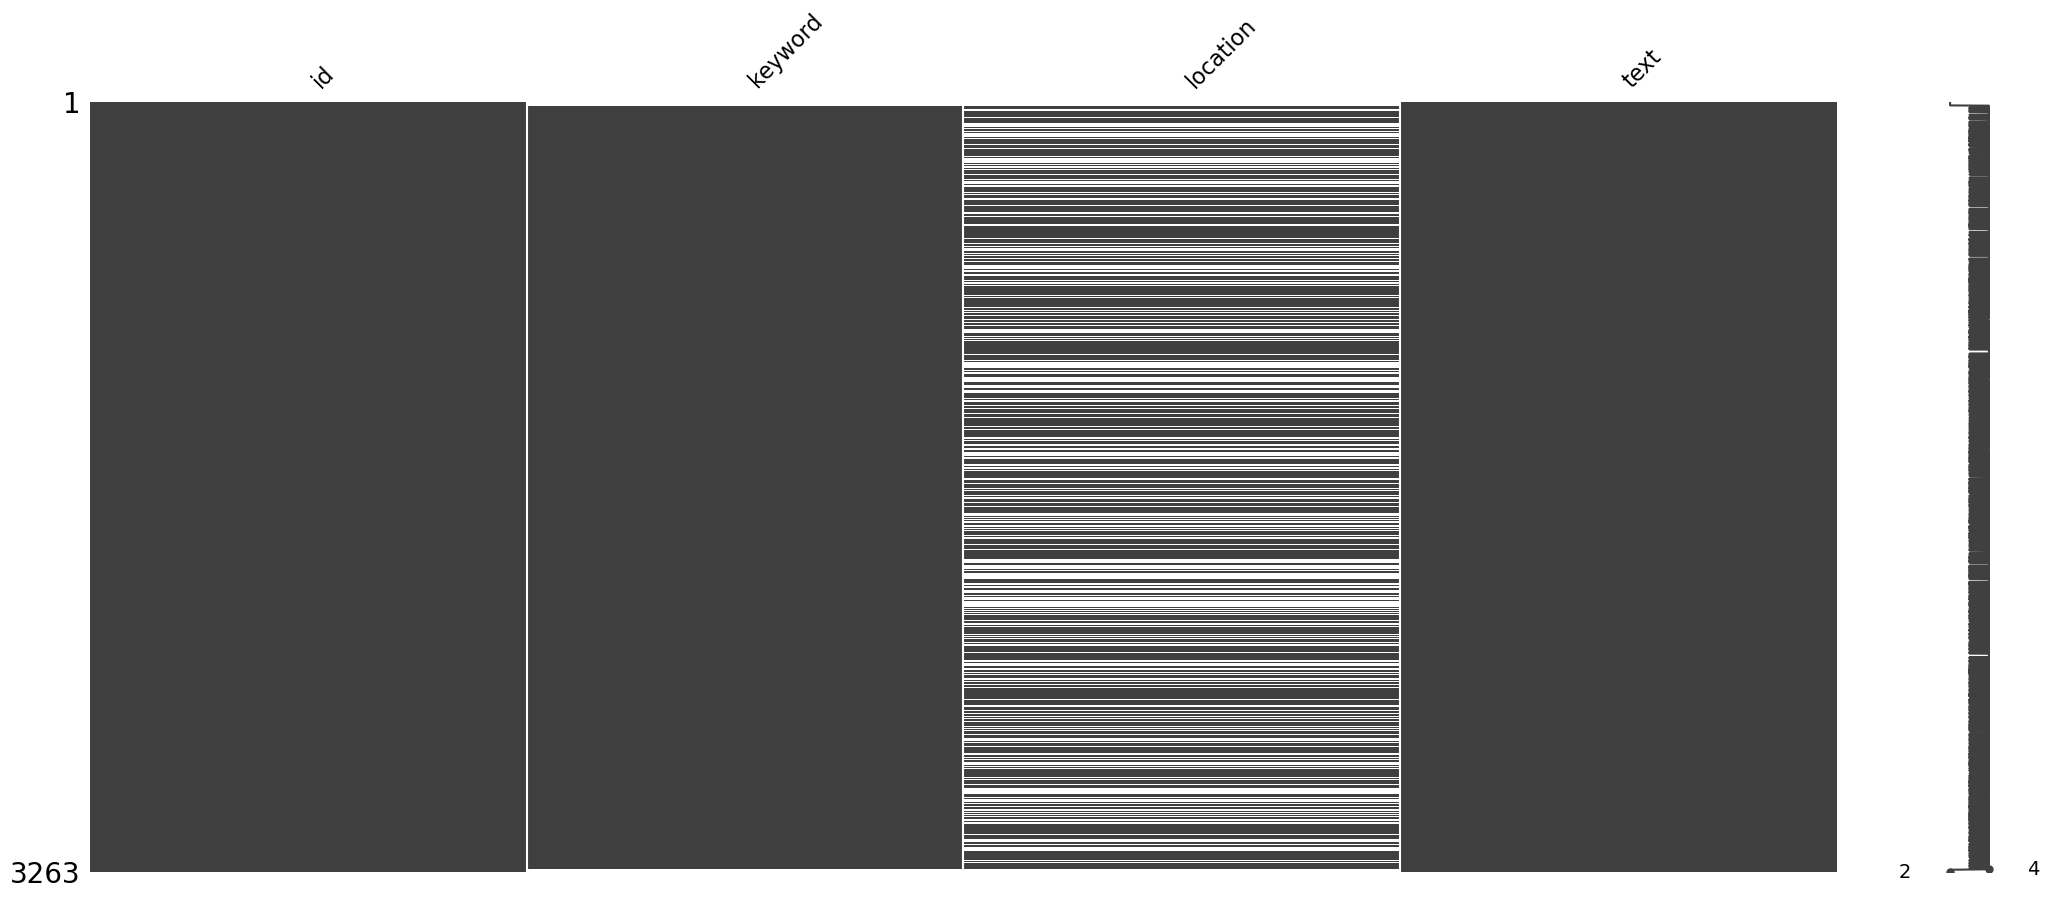

In [9]:
msno.matrix(df_test)

<AxesSubplot:>

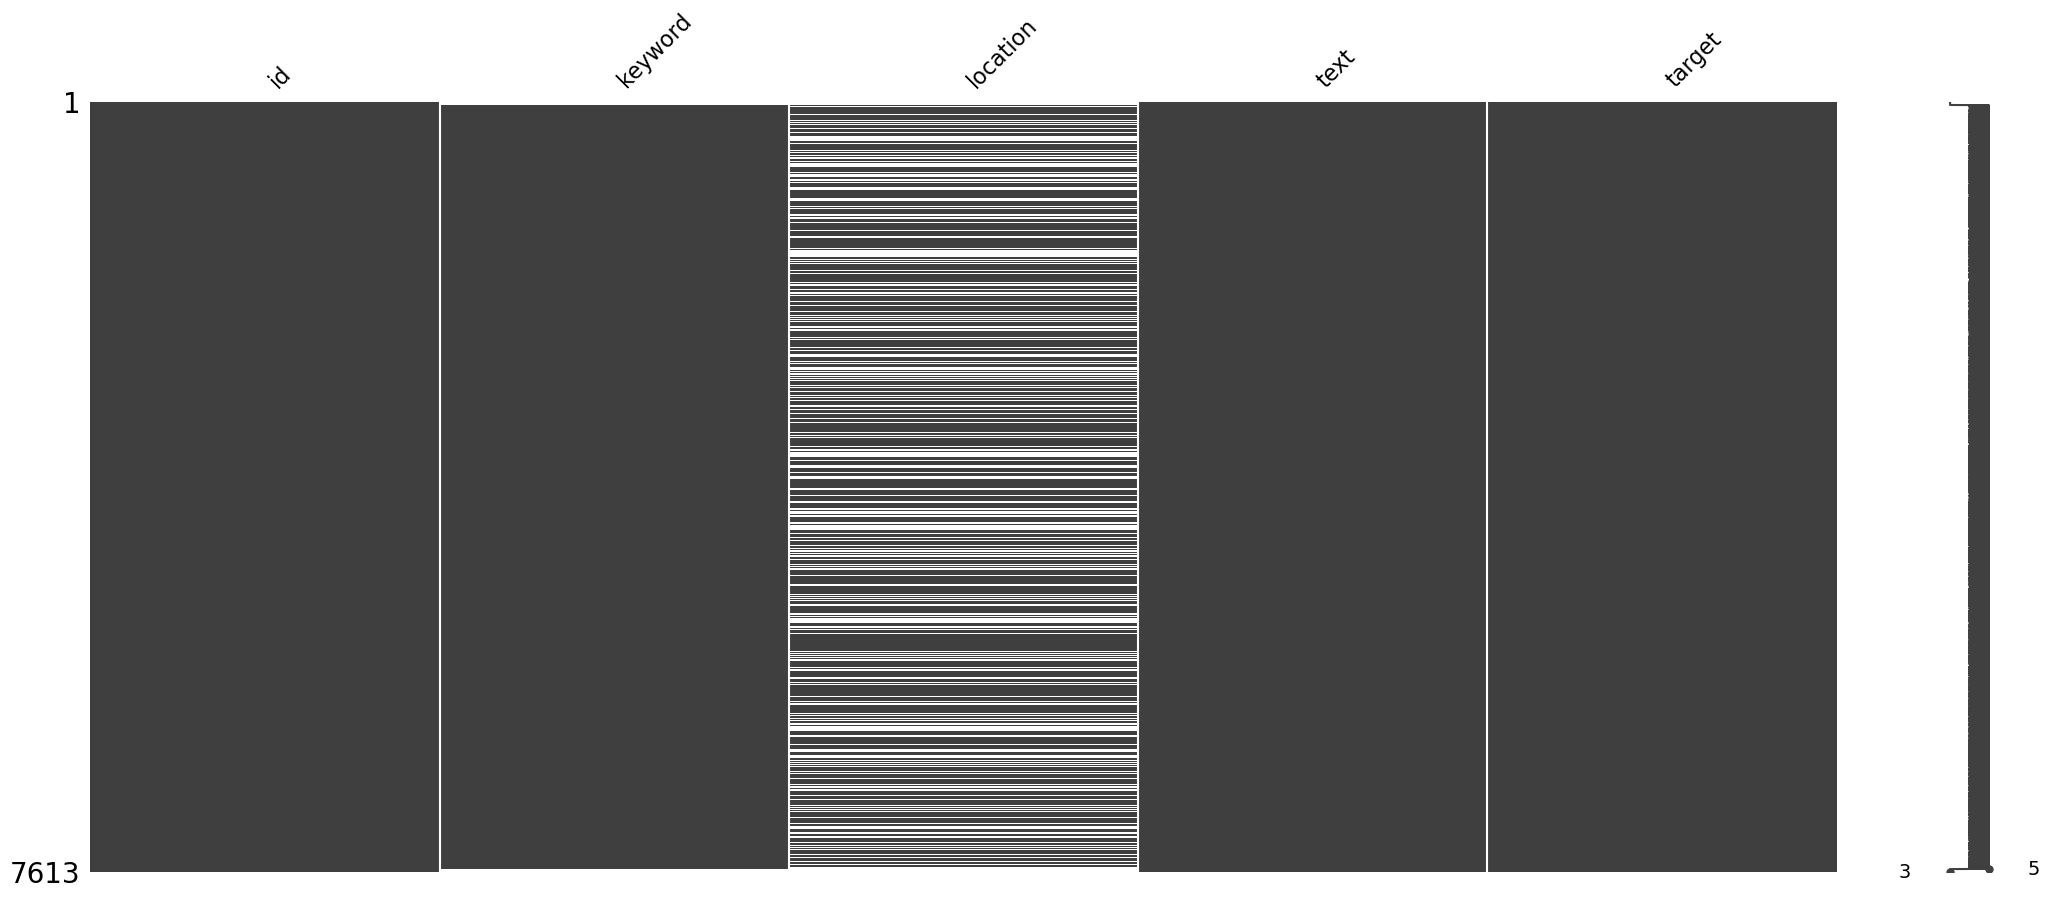

In [10]:
msno.matrix(df_train)

ont vois que localisation n'est pas toujour rempli (les tweets ne doive pas toujour dire ou ça se passe ou être vague)

In [11]:
df_train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [12]:
df_test['location'].value_counts()

New York                  38
USA                       37
Worldwide                 16
United States             15
London                    13
                          ..
Medford, NJ                1
Quezon City                1
LanÌ¼s                     1
USA,Washington,Seattle     1
Brussels, Belgium          1
Name: location, Length: 1602, dtype: int64

on voit que le test a plus souvent la location de New York , et pour train c'est plus USA.

In [13]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### E.D.A.

In [14]:
duplicates_df_test = df_test[df_test.duplicated()]
duplicates_df_test

,id,keyword,location,text


In [15]:
duplicates_df_train = df_train[df_train.duplicated()]
duplicates_df_train

,id,keyword,location,text,target


il ne semble pas avoir de doublon 

In [16]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [17]:
def token(text):
    try:
        token = word_tokenize(text)
        return token
    except Exception as e:
        print("Error:" , e ,1)

In [18]:
def stematisation(token):
    try:
        stem = [ps.stem(w) for w in token if not w.lower() in stop_words]
        return stem
    except Exception as e:
        print("error",e ,2)

In [19]:
def cleaned_tweets(stematisation):
    try:
        cleaned_tweet = ' '.join(stematisation)
        return cleaned_tweet
    except Exception as e:
        print("error", e ,3)

In [20]:
df_train['token'] = df_train['text'].apply(token)
df_train['stematisation'] = df_train['token'].apply(stematisation)
df_train['cleaned_tweet'] = df_train['stematisation'].apply(cleaned_tweets)

In [21]:
df_train = df_train.dropna(subset=['cleaned_tweet'])
df_train

,id,keyword,location,text,target,token,stematisation,cleaned_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea...","[deed, reason, #, earthquak, may, allah, forgi...",deed reason # earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]","[forest, fire, near, la, rong, sask, ., canada]",forest fire near la rong sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...","[resid, ask, 'shelter, place, ', notifi, offic...",resid ask 'shelter place ' notifi offic . evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord...","13,000 peopl receiv # wildfir evacu order cali..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #, ...","[got, sent, photo, rubi, #, alaska, smoke, #, ...",got sent photo rubi # alaska smoke # wildfir p...
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...","[two, giant, crane, hold, bridg, collaps, near...",two giant crane hold bridg collaps nearbi home...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@, aria_ahrary, @, TheTawniest, The, out, of,...","[@, aria_ahrari, @, thetawniest, control, wild...",@ aria_ahrari @ thetawniest control wild fire ...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [, 01:04, UTC, ], ?, 5km, S, of, Volca...","[m1.94, [, 01:04, utc, ], ?, 5km, volcano, haw...",m1.94 [ 01:04 utc ] ? 5km volcano hawaii . htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...","[polic, investig, e-bik, collid, car, littl, p...",polic investig e-bik collid car littl portug ....


In [22]:
df_test['token'] = df_train['text'].apply(token)
df_test['stematisation'] = df_train['token'].apply(stematisation)
df_test['cleaned_tweet'] = df_train['stematisation'].apply(cleaned_tweets)

In [23]:
df_test = df_test.dropna(subset=['cleaned_tweet'])
df_test

,id,keyword,location,text,token,stematisation,cleaned_tweet
0,0,NaN,NaN,Just happened a terrible car crash,"[Our, Deeds, are, the, Reason, of, this, #, ea...","[deed, reason, #, earthquak, may, allah, forgi...",deed reason # earthquak may allah forgiv us
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[Forest, fire, near, La, Ronge, Sask, ., Canada]","[forest, fire, near, la, rong, sask, ., canada]",forest fire near la rong sask . canada
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[All, residents, asked, to, 'shelter, in, plac...","[resid, ask, 'shelter, place, ', notifi, offic...",resid ask 'shelter place ' notifi offic . evac...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord...","13,000 peopl receiv # wildfir evacu order cali..."
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[Just, got, sent, this, photo, from, Ruby, #, ...","[got, sent, photo, rubi, #, alaska, smoke, #, ...",got sent photo rubi # alaska smoke # wildfir p...
...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[Do, you, feel, engulfed, with, low, self-imag...","[feel, engulf, low, self-imag, ?, take, quiz, ...",feel engulf low self-imag ? take quiz : http :...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[Man, is, equally, incapable, of, seeing, the,...","[man, equal, incap, see, nothing, emerg, infin...",man equal incap see nothing emerg infin engulf...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[Fully, Engulfed, Garage, Fire, :, Propane, Ta...","[fulli, engulf, garag, fire, :, propan, tank, ...",fulli engulf garag fire : propan tank insid . ...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[He, came, to, a, land, which, was, engulfed, ...","[came, land, engulf, tribal, war, turn, land, ...",came land engulf tribal war turn land peac i.e...


In [24]:
df_test['tokens'] = df_test['cleaned_tweet'].astype(str)
df_test.tokens

0             deed reason # earthquak may allah forgiv us
1                  forest fire near la rong sask . canada
2       resid ask 'shelter place ' notifi offic . evac...
3       13,000 peopl receiv # wildfir evacu order cali...
4       got sent photo rubi # alaska smoke # wildfir p...
                              ...                        
3258    feel engulf low self-imag ? take quiz : http :...
3259    man equal incap see nothing emerg infin engulf...
3260    fulli engulf garag fire : propan tank insid . ...
3261    came land engulf tribal war turn land peac i.e...
3262    @ suelinflow word describ physic painthey rip ...
Name: tokens, Length: 3263, dtype: object

In [25]:
df_train['tokens'] = df_train['cleaned_tweet'].astype(str)
df_train.tokens

0             deed reason # earthquak may allah forgiv us
1                  forest fire near la rong sask . canada
2       resid ask 'shelter place ' notifi offic . evac...
3       13,000 peopl receiv # wildfir evacu order cali...
4       got sent photo rubi # alaska smoke # wildfir p...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    @ aria_ahrari @ thetawniest control wild fire ...
7610    m1.94 [ 01:04 utc ] ? 5km volcano hawaii . htt...
7611    polic investig e-bik collid car littl portug ....
7612    latest : home raze northern california wildfir...
Name: tokens, Length: 7613, dtype: object

In [26]:
wordcloud = WordCloud(width=800, height=500, random_state=21,background_color='white').generate(' '.join(df_train['cleaned_tweet'].tolist()))

In [27]:
train = WordCloud(width=800, height=500, random_state=21,background_color='black').generate(' '.join(df_train['text'].tolist()))

In [28]:
wordcloud_test = WordCloud(width=800, height=500, random_state=21,background_color='white').generate(' '.join(df_test['cleaned_tweet'].tolist()))

une petite commande pour utiliser un thème sur les graphics  les graphiques 

In [29]:
sns.set_theme(style="white")

In [30]:
test = WordCloud(width=800, height=500, random_state=21,background_color ='black', ).generate(' '.join(df_test['text'].tolist()))

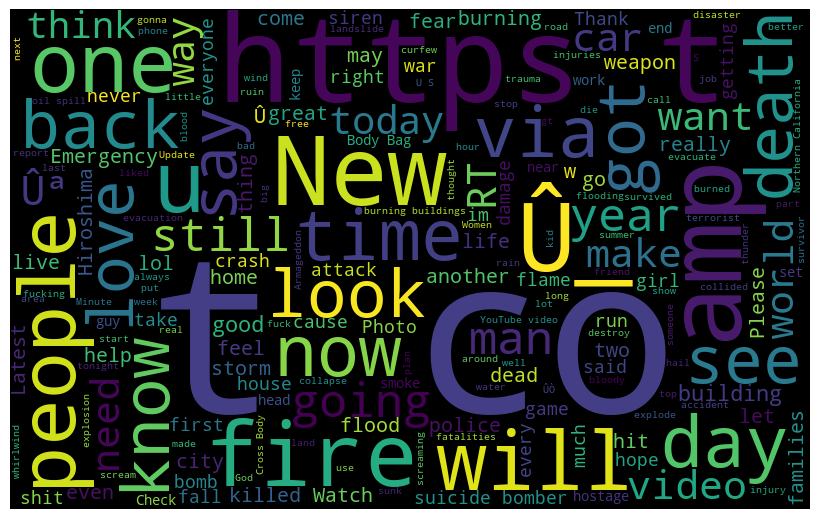

In [31]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(train)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

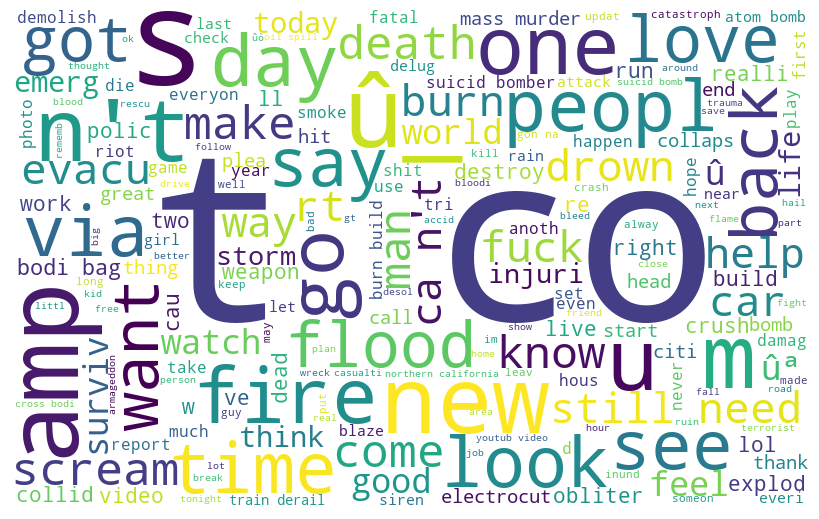

In [32]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

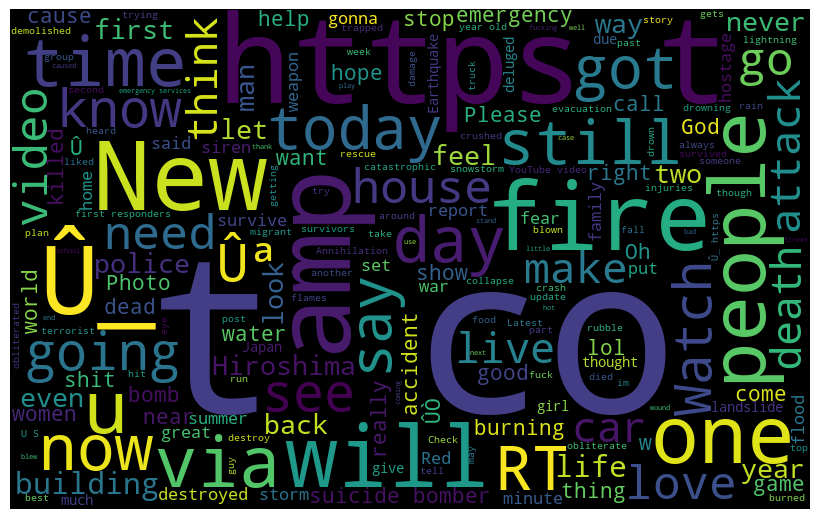

In [33]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(test)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

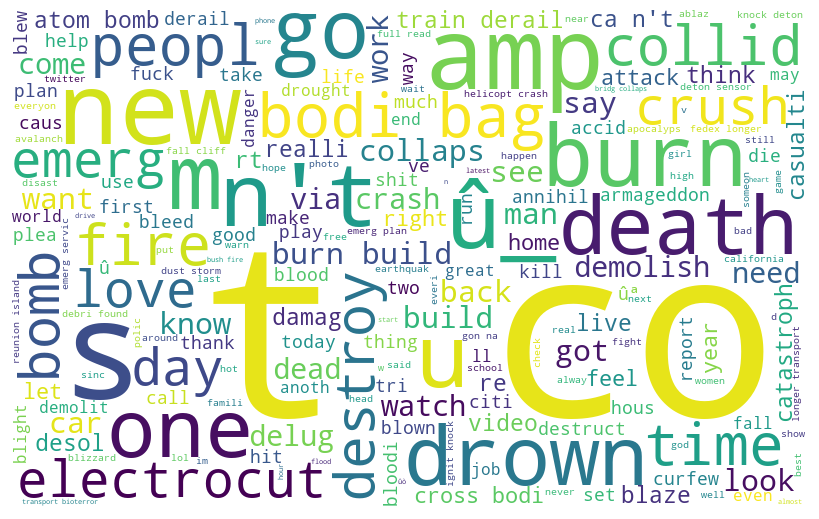

In [34]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_test)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

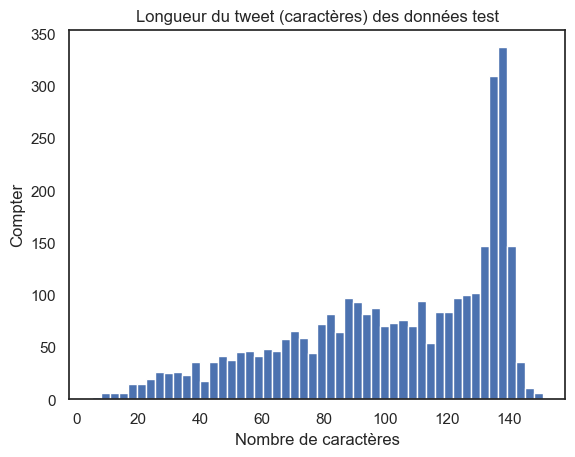

In [35]:
df_test['tweet_length_chars'] = df_test['text'].apply(len)
df_test['tweet_length_words'] = df_test['text'].apply(lambda x: len(word_tokenize(x)))
plt.hist(df_test['tweet_length_chars'], bins=50)
plt.title('Longueur du tweet (caractères) des données test')
plt.xlabel('Nombre de caractères')
plt.ylabel('Compter')
plt.show()

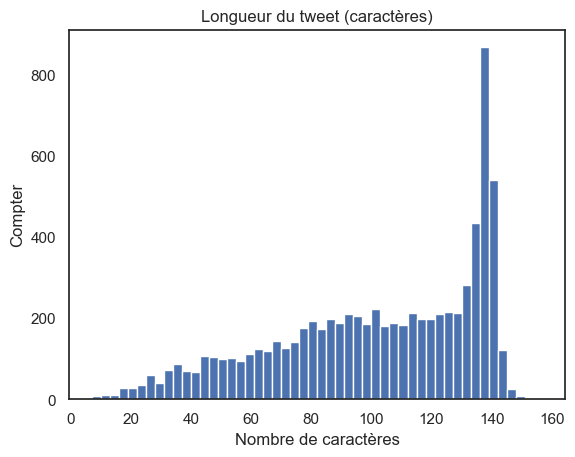

In [36]:
df_train['tweet_length_chars'] = df_train['text'].apply(len)
df_train['tweet_length_words'] = df_train['text'].apply(lambda x: len(word_tokenize(x)))
plt.hist(df_train['tweet_length_chars'], bins=50)
plt.title('Longueur du tweet (caractères)')
plt.xlabel('Nombre de caractères')
plt.ylabel('Compter')
plt.show()

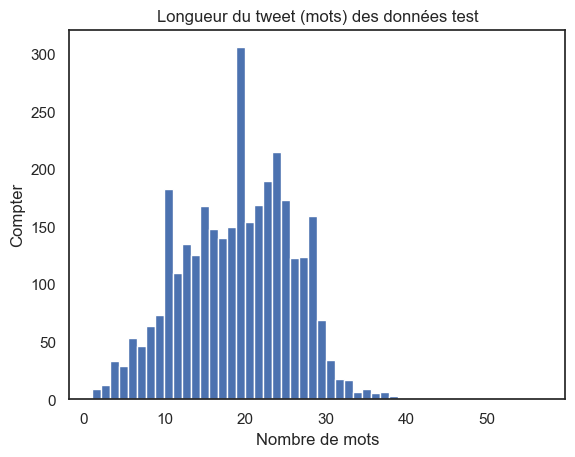

In [37]:
plt.hist(df_test['tweet_length_words'], bins=50)
plt.title('Longueur du tweet (mots) des données test')
plt.xlabel('Nombre de mots')
plt.ylabel('Compter')
plt.show()

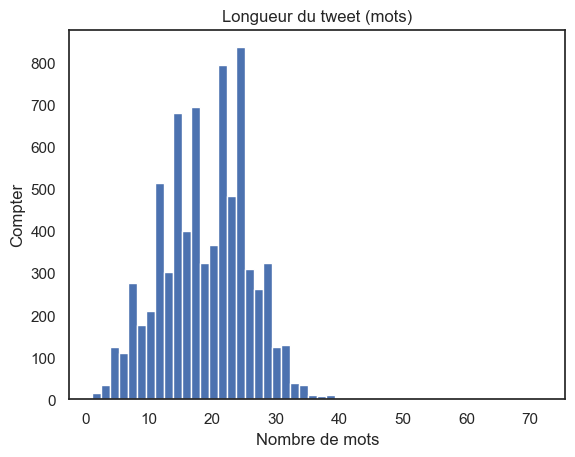

In [38]:
plt.hist(df_train['tweet_length_words'], bins=50)
plt.title('Longueur du tweet (mots)')
plt.xlabel('Nombre de mots')
plt.ylabel('Compter')
plt.show()

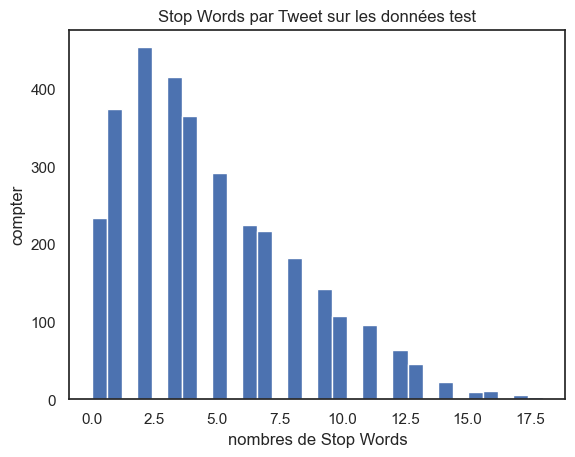

In [39]:
df_test['stop_words_count'] = df_test['text'].apply(lambda x: len([word for word in word_tokenize(x.lower()) if word in stop_words]))
plt.hist(df_test['stop_words_count'], bins=30)
plt.title('Stop Words par Tweet sur les données test')
plt.xlabel('nombres de Stop Words')
plt.ylabel('compter')
plt.show()

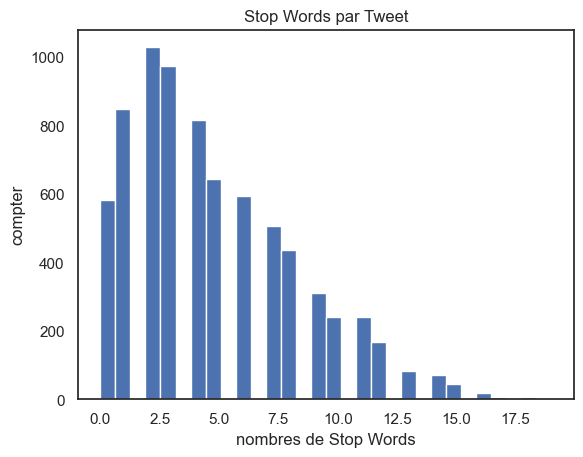

In [40]:
df_train['stop_words_count'] = df_train['text'].apply(lambda x: len([word for word in word_tokenize(x.lower()) if word in stop_words]))
plt.hist(df_train['stop_words_count'], bins=30)
plt.title('Stop Words par Tweet')
plt.xlabel('nombres de Stop Words')
plt.ylabel('compter')
plt.show()

In [41]:
targets= df_train.groupby(['target']).size().to_frame().sort_values([0], ascending=False).reset_index()
targets

,target,0
0,0,4342
1,1,3271


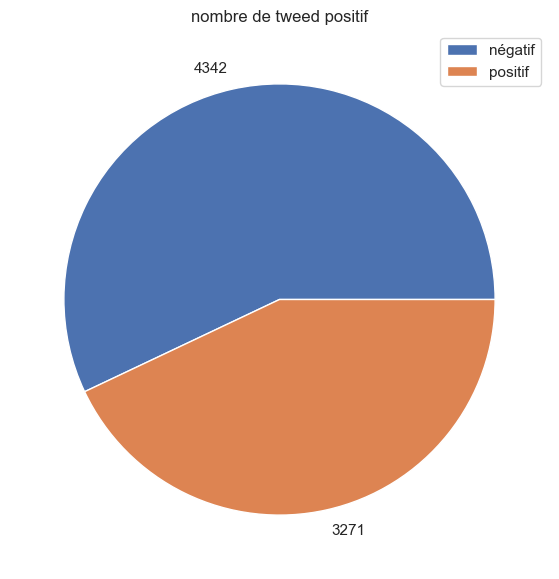

In [42]:
fig = plt.figure(figsize =(10, 7))
plt.pie(targets[0], labels = targets[0]) 
plt.title("nombre de tweed positif")
plt.legend(["négatif","positif"])

plt.savefig("targets.png") 

plt.show()

In [43]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['text'])

In [44]:
y = df_train['cleaned_tweet']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
clf = DecisionTreeClassifier(random_state=42)

In [47]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)

In [48]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
rfr.fit(X_train, y_train)

ValueError: could not convert string to float: '@ dicehatem @ puppyshogun make sens . paper beat rock paper come wood wood abl support obliter rock .'

In [50]:
accuracy = accuracy_score(y_train, x_train)
print("Accuracy:", accuracy)

NameError: name 'x_train' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(clf, filled=True, ax=axes)
plt.show()